In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

mcdonalds = pd.read_csv('mcdonalds.csv')
mcdonalds.columns


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
mcdonalds.shape
mcdonalds.head(3)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
import numpy as np
MD_x = mcdonalds.iloc[:, :11]
MD_x = (MD_x == "Yes").astype(int)
mean_values = MD_x.mean().round(2)
mean_values



yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [7]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(MD_x)

explained_variance = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

explained_variance


,PC,Explained Variance Ratio
0,PC1,0.299447
1,PC2,0.192797
2,PC3,0.133045
3,PC4,0.083096
4,PC5,0.059481
5,PC6,0.050300
6,PC7,0.043849
7,PC8,0.039548
8,PC9,0.036761
9,PC10,0.032353


In [8]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(MD_x)

explained_variance = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})
explained_variance = explained_variance.round(1)
explained_variance


,PC,Explained Variance Ratio
0,PC1,0.3
1,PC2,0.2
2,PC3,0.1
3,PC4,0.1
4,PC5,0.1
5,PC6,0.1
6,PC7,0.0
7,PC8,0.0
8,PC9,0.0
9,PC10,0.0


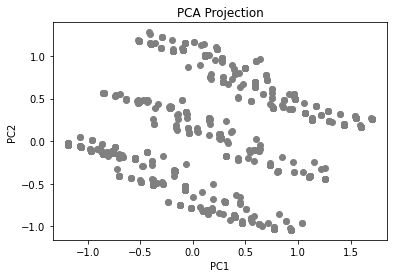

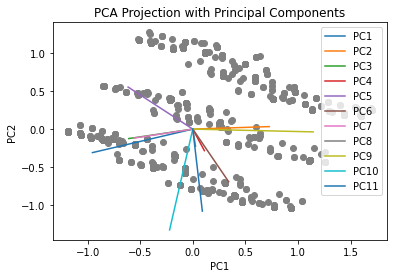

In [9]:
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(MD_x)
MD_pca = pca.transform(MD_x)

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

# For projAxes equivalent, visualize the principal component axes
mean = np.mean(MD_pca, axis=0)
components = pca.components_

for i in range(components.shape[0]):
    plt.plot([mean[0], mean[0] + components[i, 0] * 2], 
             [mean[1], mean[1] + components[i, 1] * 2], 
             label=f'PC{i+1}')

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection with Principal Components')
plt.legend()
plt.show()


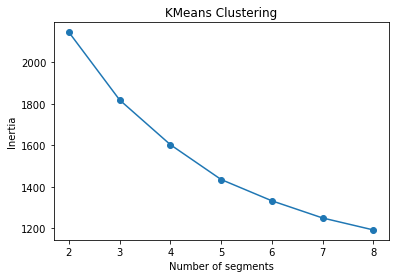

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

def step_flexclust(X, k_range, nrep=10):
    best_k = None
    best_model = None
    best_inertia = np.inf

    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(X)
        inertia = kmeans.inertia_

        if inertia < best_inertia:
            best_inertia = inertia
            best_k = k
            best_model = kmeans

    return best_model, best_k

k_range = range(2, 9)
best_model, best_k = step_flexclust(MD_x, k_range)

inertia_values = [KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x).inertia_ for k in k_range]

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Inertia')
plt.title('KMeans Clustering')
plt.show()


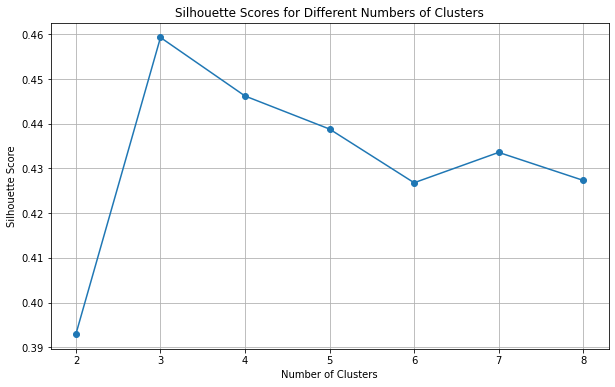

   Feature1  Feature2  Cluster
0  0.191519  0.767117        1
1  0.622109  0.708115        0
2  0.437728  0.796867        1
3  0.785359  0.557761        0
4  0.779976  0.965837        0


In [11]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Set the environment variable to avoid memory leak warnings
os.environ['OMP_NUM_THREADS'] = '1'

# Generate synthetic data
MD_x = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
})

np.random.seed(1234)

cluster_range = range(2, 9)  # From 2 to 8 clusters
kmeans_models = {}
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    kmeans_models[k] = kmeans
    score = silhouette_score(MD_x, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()

best_k = cluster_range[np.argmax(silhouette_scores)]
best_kmeans = kmeans_models[best_k]

MD_x['Cluster'] = best_kmeans.labels_

# Identity mapping for relabeling clusters
relabel_mapping = {i: i for i in range(best_k)}
MD_x['Cluster'] = MD_x['Cluster'].map(relabel_mapping)

print(MD_x.head())


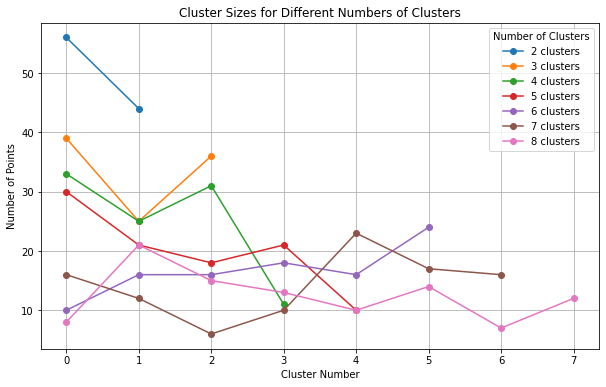

In [12]:
import matplotlib.pyplot as plt
import numpy as np
cluster_counts = {}
for k, model in kmeans_models.items():
    labels = model.labels_
    counts = np.bincount(labels)
    cluster_counts[k] = counts

plt.figure(figsize=(10, 6))
for k, counts in cluster_counts.items():
    plt.plot(range(len(counts)), counts, marker='o', label=f'{k} clusters')

plt.xlabel('Cluster Number')
plt.ylabel('Number of Points')
plt.title('Cluster Sizes for Different Numbers of Clusters')
plt.legend(title='Number of Clusters')
plt.grid(True)
plt.show()

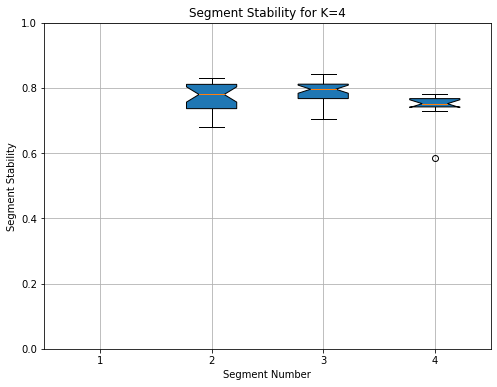

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt

kmeans = kmeans_models[4]
silhouette_vals = silhouette_samples(MD_x, kmeans.labels_)
stability_scores = [silhouette_vals[kmeans.labels_ == i] for i in range(4)]

plt.figure(figsize=(8, 6))
plt.boxplot(stability_scores, notch=True, patch_artist=True)
plt.ylim(0, 1)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Stability for K=4')
plt.grid(True)
plt.show()


In [14]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Assuming MD_x is your binary data and is loaded properly
# Define range of number of components (clusters) to test
cluster_range = range(2, 9)

# Dictionary to store GMM models
gmm_models = {}

# Fit GMM for each number of components
for n_components in cluster_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(MD_x)
    gmm_models[n_components] = gmm

# Example: Print out the model summary for k = 2 to 8
for n_components, model in gmm_models.items():
    print(f"Number of components (clusters): {n_components}")
    print(f"Converged: {model.converged_}")
    print(f"AIC: {model.aic(MD_x)}")
    print(f"BIC: {model.bic(MD_x)}")
    print()

# You can use silhouette score to evaluate the clustering
for n_components in cluster_range:
    gmm = gmm_models[n_components]
    labels = gmm.predict(MD_x)
    score = silhouette_score(MD_x, labels)
    print(f"Silhouette Score for {n_components} clusters: {score:.3f}")
     

Number of components (clusters): 2
Converged: True
AIC: -355.945149224244
BIC: -306.4469156904703

Number of components (clusters): 3
Converged: True
AIC: -1110.906399624774
BIC: -1035.3564642311194

Number of components (clusters): 4
Converged: True
AIC: -1103.513332612229
BIC: -1001.9116953586935

Number of components (clusters): 5
Converged: True
AIC: -1102.4950348317452
BIC: -974.8416957183288

Number of components (clusters): 6
Converged: True
AIC: -1088.064835280865
BIC: -934.3597943075677

Number of components (clusters): 7
Converged: True
AIC: -1093.2730257031603
BIC: -913.516282869982

Number of components (clusters): 8
Converged: True
AIC: -1079.820057164615
BIC: -874.0116124715557

Silhouette Score for 2 clusters: 0.649
Silhouette Score for 3 clusters: 0.758
Silhouette Score for 4 clusters: 0.667
Silhouette Score for 5 clusters: 0.587
Silhouette Score for 6 clusters: 0.444
Silhouette Score for 7 clusters: 0.426
Silhouette Score for 8 clusters: 0.433


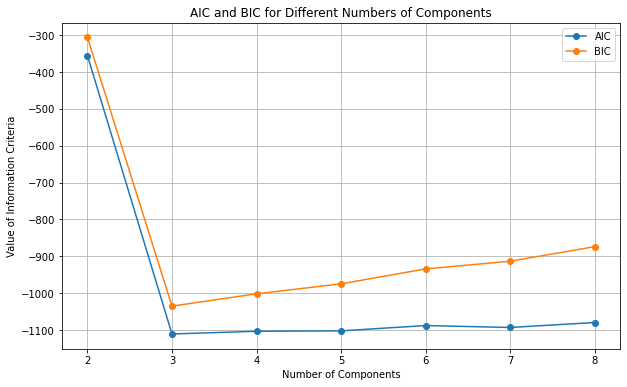

col_0     0   1   2   3
Cluster                
0        39   0   0   0
1         0   0  25   0
2         0  10   0  26


In [15]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Plotting information criteria (AIC, BIC)
aic = [gmm.aic(MD_x) for gmm in gmm_models.values()]
bic = [gmm.bic(MD_x) for gmm in gmm_models.values()]

plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), aic, marker='o', label='AIC')
plt.plot(range(2, 9), bic, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.title('AIC and BIC for Different Numbers of Components')
plt.grid(True)
plt.legend()
plt.show()

# Selecting the model with 4 components
gmm_4 = gmm_models[4]
mixture_clusters = gmm_4.predict(MD_x)

# Cross-tabulation between KMeans and Gaussian Mixture clusters
kmeans_clusters = MD_x['Cluster']
cross_tab = pd.crosstab(kmeans_clusters, mixture_clusters)

print(cross_tab)


In [16]:
from sklearn.mixture import GaussianMixture
import pandas as pd

gmm_4a = GaussianMixture(n_components=4, covariance_type='full', random_state=1234)
gmm_4a.fit(MD_x)
mixture_clusters_4a = gmm_4a.predict(MD_x)

kmeans_clusters = MD_x['Cluster']
cross_tab_4a = pd.crosstab(kmeans_clusters, mixture_clusters_4a)

print(cross_tab_4a)


col_0     0   1   2   3
Cluster                
0        39   0   0   0
1         0   0  25   0
2         0  10   0  26


In [17]:
like_counts = mcdonalds['Like'].value_counts(ascending=True)
print(like_counts)


-1               58
-2               59
-4               71
-3               73
I love it!+5    143
+1              152
I hate it!-5    152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


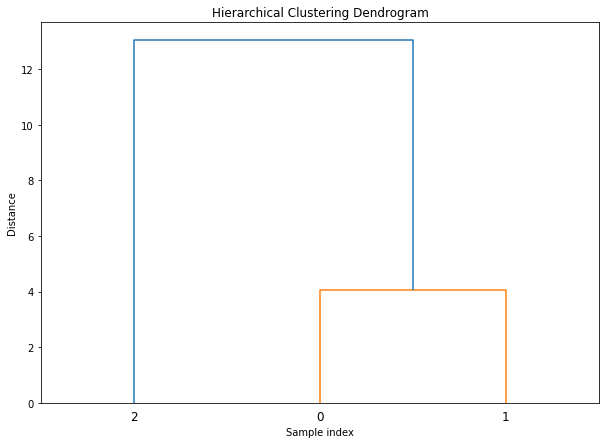

In [18]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

MD_x_transposed = MD_x.T

dist_matrix = pdist(MD_x_transposed, metric='euclidean')

linked = linkage(dist_matrix, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

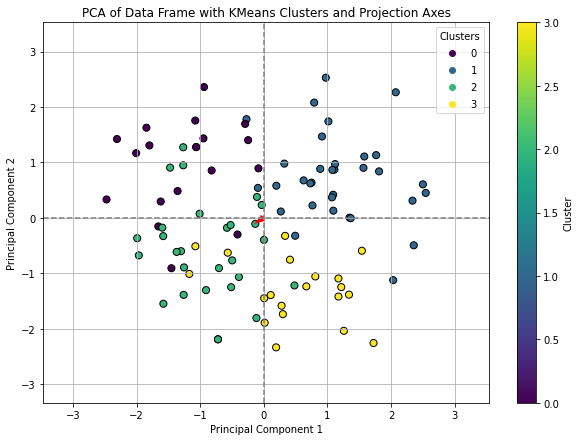

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

np.random.seed(1234)
data_frame = pd.DataFrame(np.random.randint(0, 2, size=(100, 11)), columns=[f'Feature_{i}' for i in range(11)])
kmeans_model = KMeans(n_clusters=4, random_state=1234)
cluster_labels = kmeans_model.fit_predict(data_frame)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_frame)
pca_model = PCA(n_components=2)
pca_result = pca_model.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

plt.figure(figsize=(10, 7))

scatter_plot = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Data Frame with KMeans Clusters and Projection Axes')

for i, (component, value) in enumerate(zip(pca_model.components_, pca_model.explained_variance_ratio_)):
    plt.quiver(0, 0, component[0], component[1], angles='xy', scale_units='xy', scale=2, color='red', label=f'PC{i+1}')

plt.legend(*scatter_plot.legend_elements(), title="Clusters")
plt.colorbar(scatter_plot, label='Cluster')

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

plt.xlim(min(pca_df['PC1']) - 1, max(pca_df['PC1']) + 1)
plt.ylim(min(pca_df['PC2']) - 1, max(pca_df['PC2']) + 1)

plt.grid(True)
plt.show()
